In [2]:
import numpy as np
from matplotlib import pyplot as plt

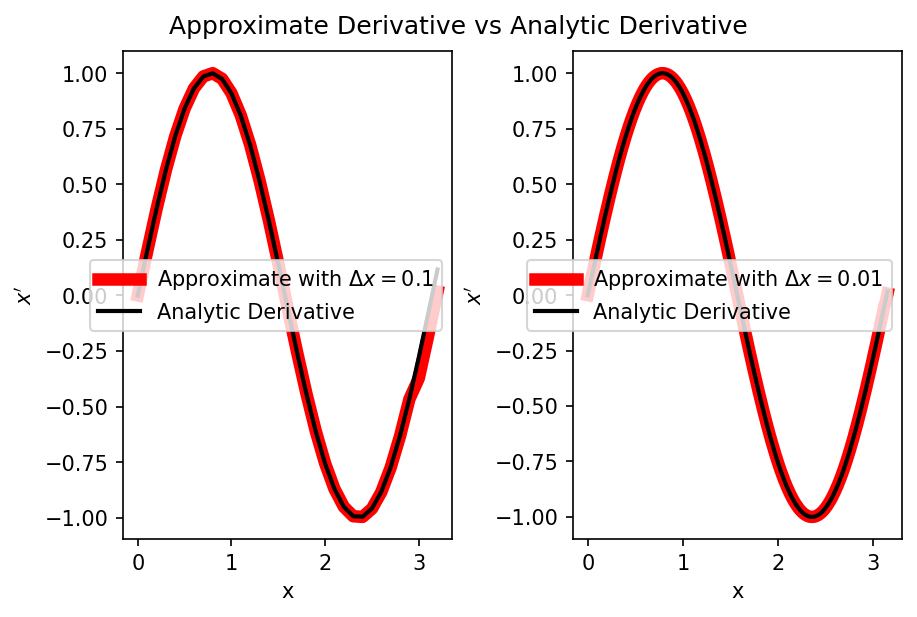

In [3]:
def deriv_3rd(f, u0, dx, x0, xf):
  '''computes approximate derivative using the one-sided 
     difference formula we derived in the previous problem
     parameters:
         f (function): the function whose derivative we want to approximate.
         u0 (float): the initial value 
         dx (float): the step difference
         t0 (float): the initial point
         tf (float): the final point
    Returns:
         u_vals (np.ndaray): the discretized derivative
         x_vals (np.ndarray): the space steps
  '''
  a_vals = [-11/6., 3, -3/2, 1/3]
  x_vals = np.arange(x0, xf + dx, dx)

  u_vals = np.empty_like(x_vals)
  u_vals[0] = u0

  for i in range(1, u_vals.size):
    #if the correct length use our derived step
    if i <= u_vals.size - len(a_vals):
      u_vals[i] = np.sum([a*f(x_vals[i+j]) for j, a in enumerate(a_vals)])/dx
    #otherwise use backward difference
    else:
      u_vals[i] = (f(x_vals[i]) - f(x_vals[i-1]))/dx


  return u_vals, x_vals

#function to take derivative of 
f = lambda x: np.sin(x)**2
#analytic derivative
analytic = lambda x: np.sin(2*x)
#initial point
u0 = 0
#initial and final spatial points
x0, xf = 0, np.pi
#step values
dx_vals =[0.1, 0.01]

fig, axs = plt.subplots(1, 2, constrained_layout=True) 
fig.set_dpi(150)
for i, dx in enumerate(dx_vals):
  ax = axs[i]
  u_vals, x_vals = deriv_3rd(f, u0, dx, x0, xf)
  ax.plot(x_vals, u_vals, 'r-', lw=6, label=r'Approximate with $\Delta x = $' + str(dx))
  ax.plot(x_vals, analytic(x_vals), 'k-', lw=2, label=r'Analytic Derivative')
  ax.legend(loc='best')
  ax.set_xlabel('x')
  ax.set_ylabel(r"$x'$")

plt.suptitle('Approximate Derivative vs Analytic Derivative')
plt.show()